<a href="https://colab.research.google.com/github/XavierCarrera/Titanic-KaggleChallenge/blob/main/Titanic_KaggleChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Problem Definition

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [6]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/db/test.csv")

In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"], axis=1, inplace=True)
test.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"], axis=1, inplace=True)

In [22]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [23]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


In [24]:
test

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
409,3,female,3.0,1,1
411,1,female,37.0,1,0
412,3,female,28.0,0,0
414,1,female,39.0,0,0


# Exploratory Data Analysis

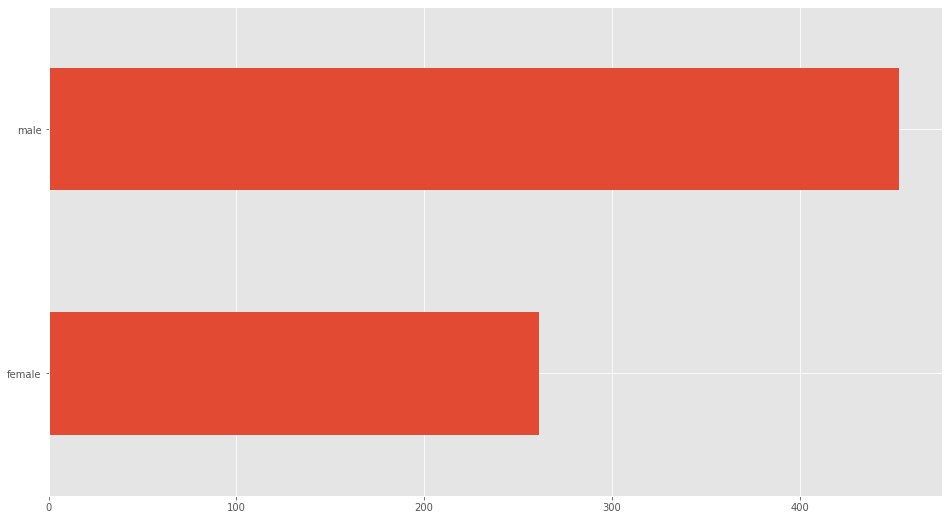

In [45]:
train.Sex.value_counts().sort_values().plot(kind = "barh")

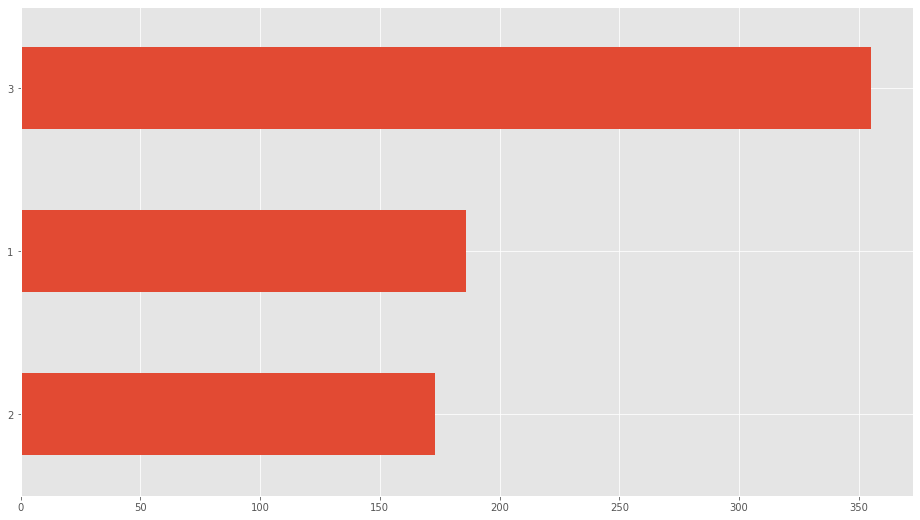

In [60]:
train.Pclass.value_counts().sort_values().plot(kind = "barh", stacked = True)

In [33]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

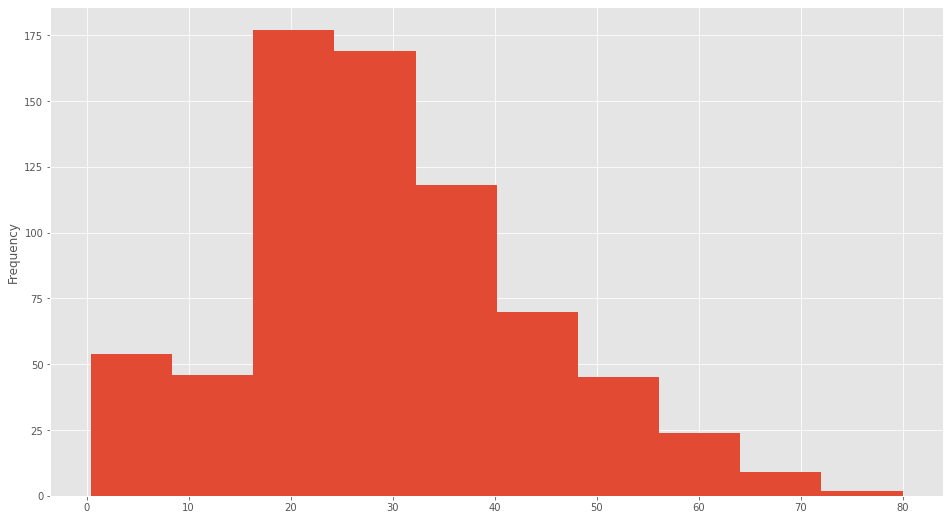

In [46]:
train.Age.plot.hist()

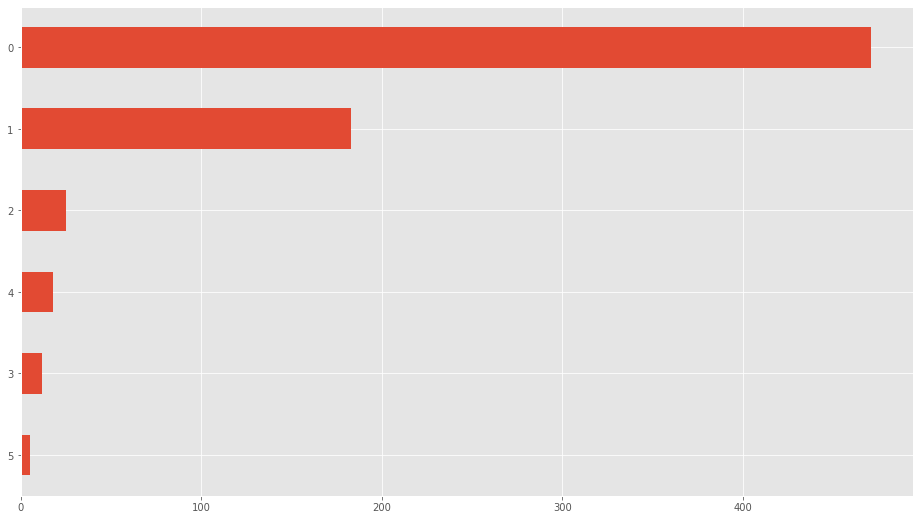

In [47]:
train.SibSp.value_counts().sort_values().plot(kind = "barh")

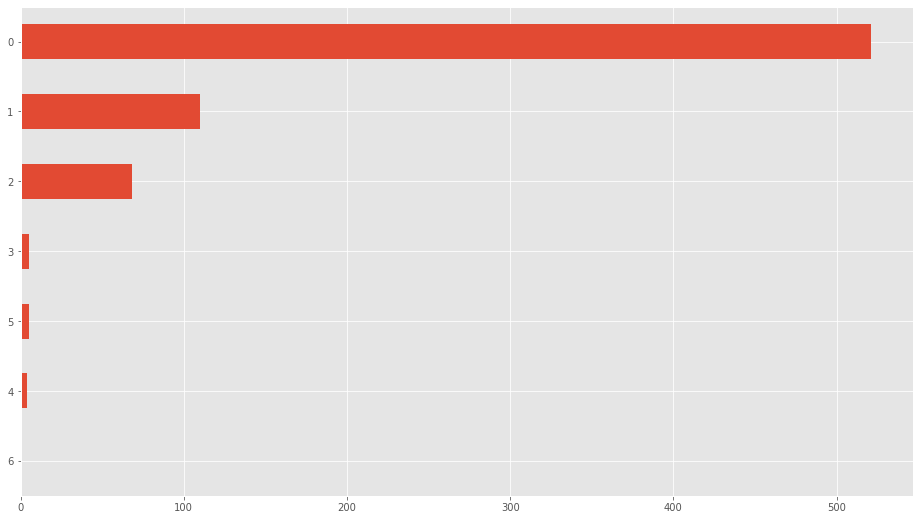

In [48]:
train.Parch.value_counts().sort_values().plot(kind = "barh")

In [41]:
survived = train[train["Survived"] == 1]
dead = train[train["Survived"] == 0]

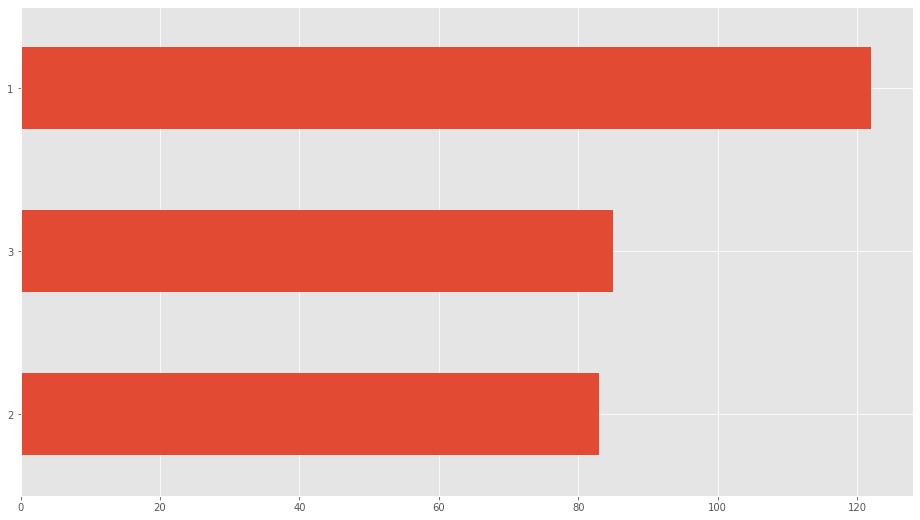

In [49]:
survived.Pclass.value_counts().sort_values().plot(kind = "barh")

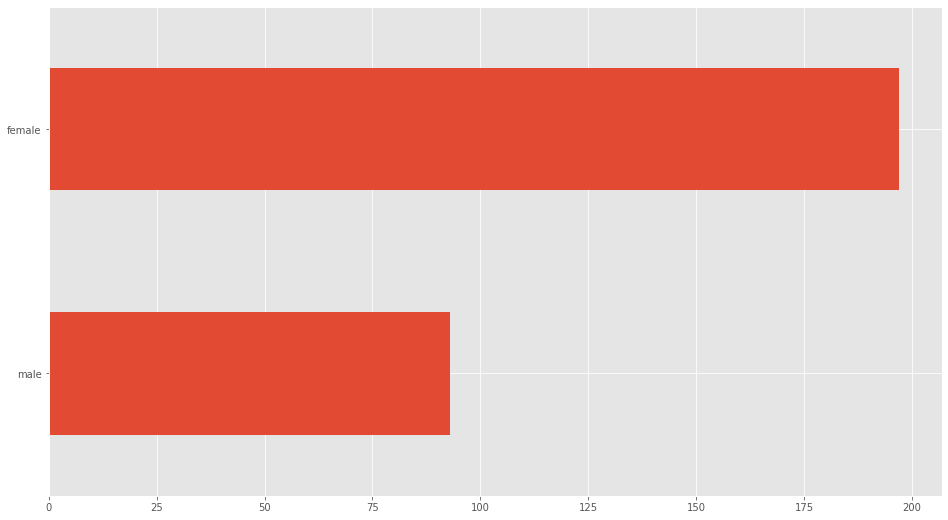

In [50]:
survived.Sex.value_counts().sort_values().plot(kind = "barh")

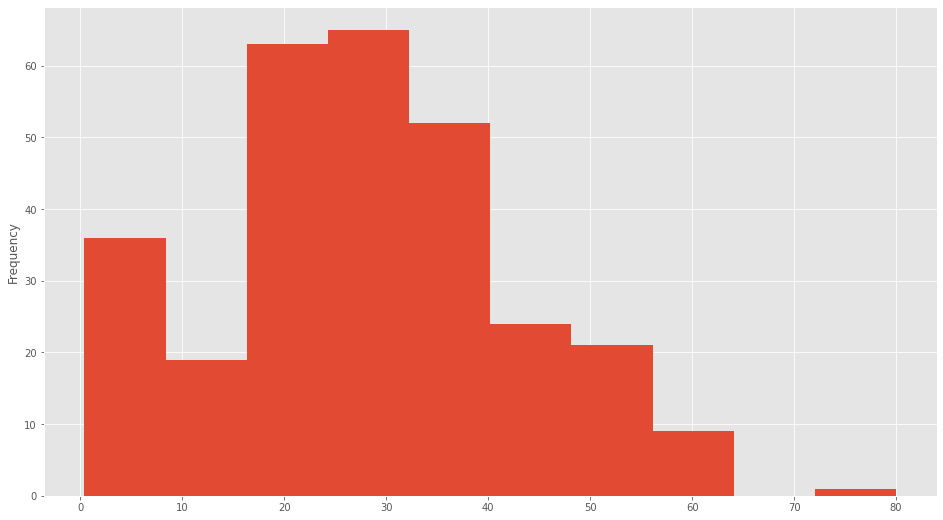

In [51]:
survived.Age.plot.hist()

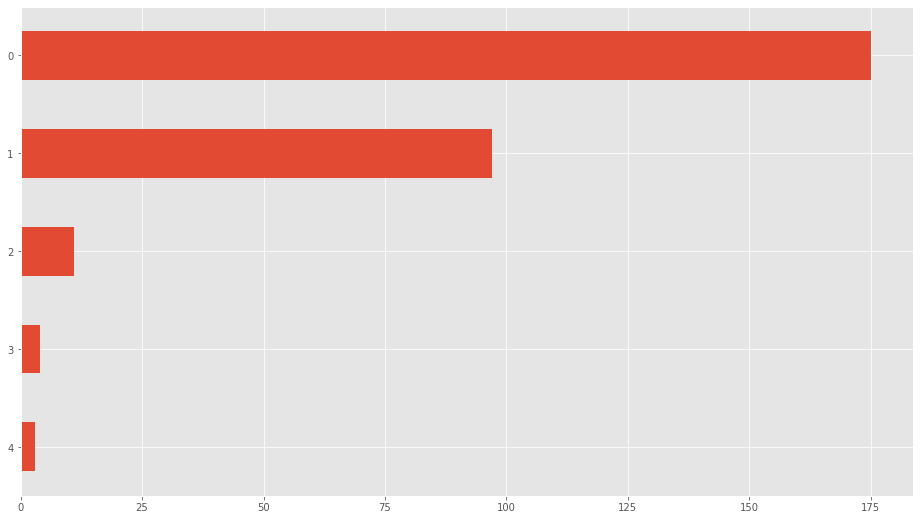

In [56]:
survived.SibSp.value_counts().sort_values().plot(kind = "barh")

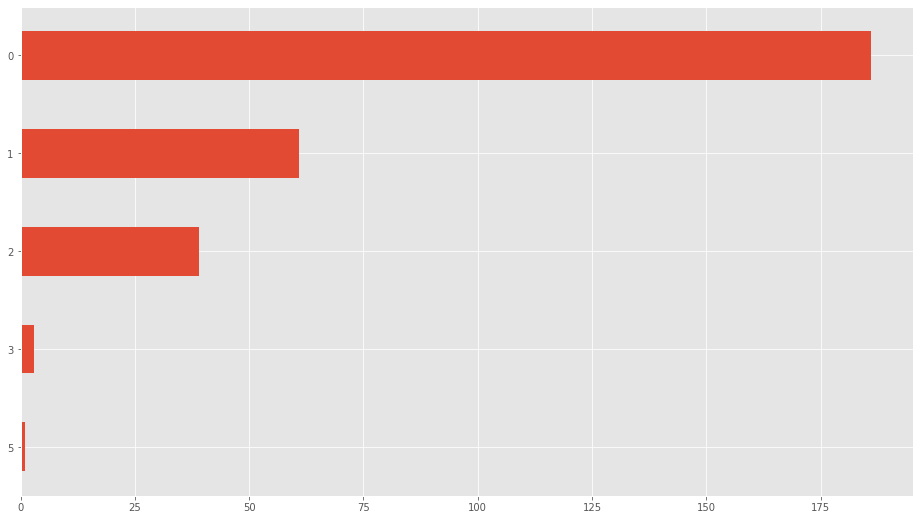

In [57]:
survived.Parch.value_counts().sort_values().plot(kind = "barh")

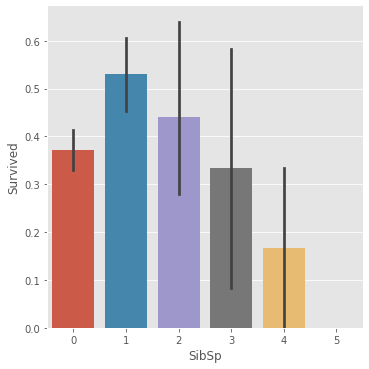

In [61]:
sns.catplot(x="SibSp",y="Survived",data=train,kind="bar")

In [ ]:
sns.catplot(x='SibSp',y='Survived',data=train,kind='bar')

# Sección nueva

# Model Training

# Model Evaluation

# Conclusion